İlgili kütüphanelerin yüklenmesi

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 500)

Keşif Amaçlı Veri Analizi 

In [3]:
#Verinin genel görünümü
df = pd.read_csv("insurance.csv")
print("----------------İlk 5 veri------------------------")
print(df.head())
print("----------------Boş hücrelerin toplamı------------------------")
print(df.isnull().sum())
print("----------------Veri bilgileri------------------------")
print(df.info())
print("----------------Genel veriler------------------------")
print(df.describe().T)

----------------İlk 5 veri------------------------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
----------------Boş hücrelerin toplamı------------------------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
----------------Veri bilgileri------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int6

{'whiskers': [<matplotlib.lines.Line2D at 0x23d4cb46c50>,
 'caps': [<matplotlib.lines.Line2D at 0x23d4c6dc6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d4cb45e50>],
 'medians': [<matplotlib.lines.Line2D at 0x23d4cba5c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d4cba6790>],
 'means': []}

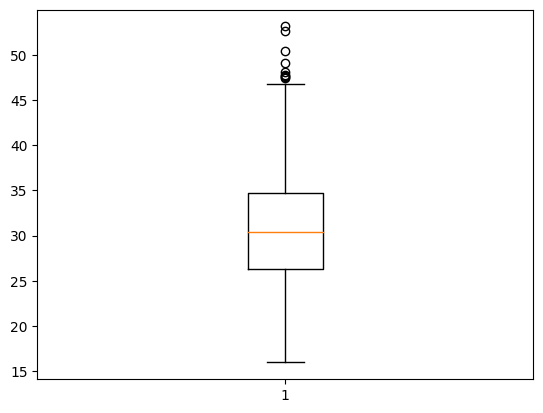

In [4]:
#BMI dağılımı. (genel olarak veriler 25-35 arasında toplanmış ve 45 üzerindeki veriler aykırı veriler olarak görünüyor.)
plt.boxplot(df["bmi"])

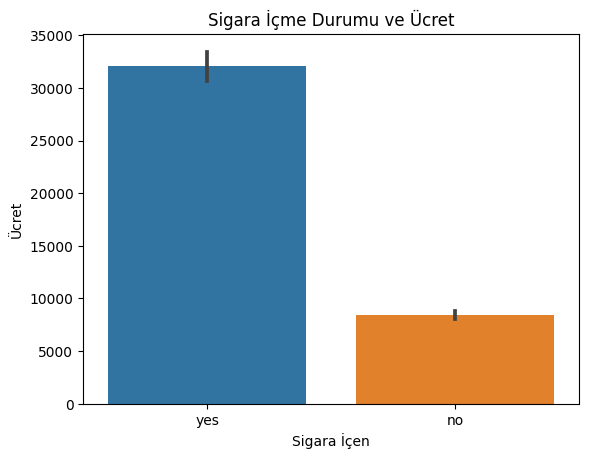

In [5]:
# Sigara içenler içmeyenlere göre çok daha fazla ücret ödemiş görünüyor.
sns.barplot(x="smoker", y="charges", data=df)
plt.xlabel("Sigara İçen")
plt.ylabel("Ücret")
plt.title("Sigara İçme Durumu ve Ücret")
plt.show()

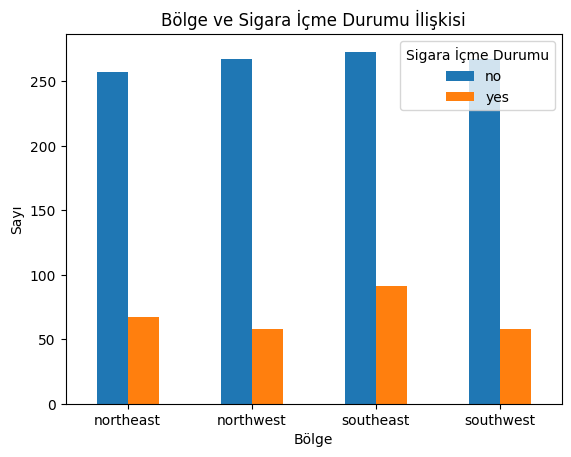

In [6]:
#Sigara içmeyten kişilerin dağılımı tüm bölgelerde hemen hemen aynı iken southeast bölgesinde sigara içenlerin sayısı yüksek görünüyor
crosstab = pd.crosstab(df["region"], df["smoker"])
crosstab.plot(kind="bar")

plt.xlabel("Bölge")
plt.ylabel("Sayı")
plt.title("Bölge ve Sigara İçme Durumu İlişkisi")
plt.xticks(rotation=0)
plt.legend(title="Sigara İçme Durumu")
plt.show()

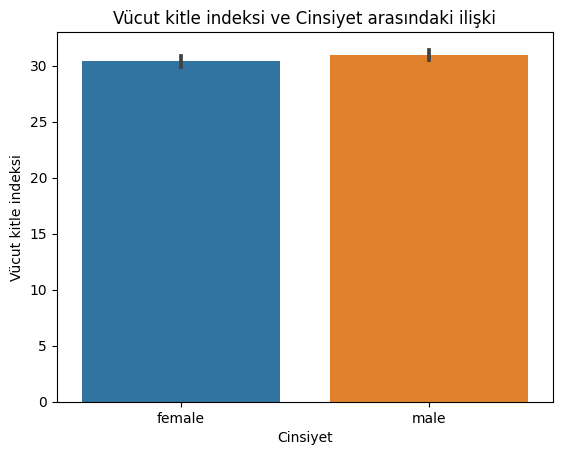

In [7]:
#cinsiyet ile vücut kitle indeksi arasında ilişki görünmüyor
sns.barplot(x="sex", y="bmi", data=df)
plt.xlabel("Cinsiyet")
plt.ylabel("Vücut kitle indeksi")
plt.title("Vücut kitle indeksi ve Cinsiyet arasındaki ilişki")
plt.show()

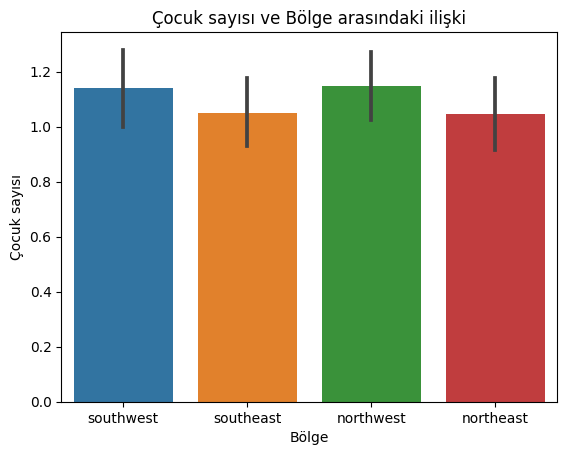

In [8]:
#En çok çocuk southwest görünüyor
sns.barplot(x="region", y="children", data=df)
plt.xlabel("Bölge")
plt.ylabel("Çocuk sayısı")
plt.title("Çocuk sayısı ve Bölge arasındaki ilişki")
plt.show()

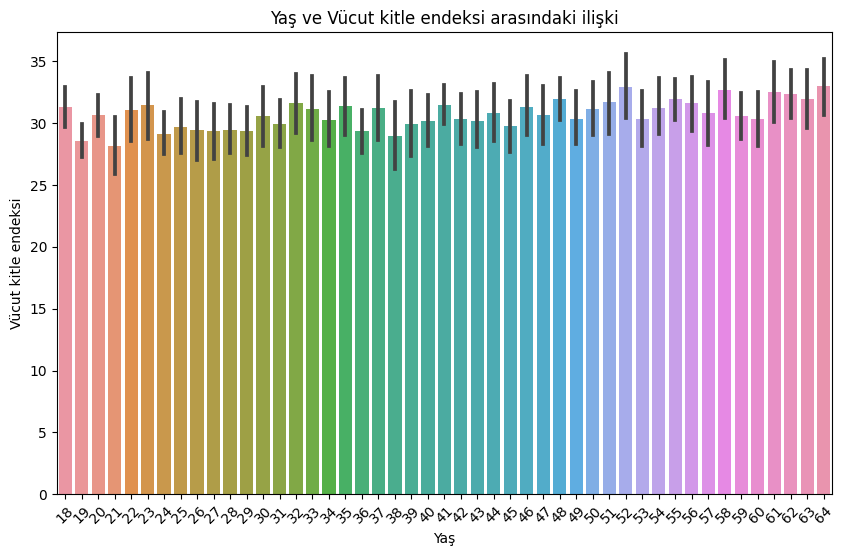

In [9]:
#yaş ile Vücut kitle endeksi arasında bariz bir ilişki görünmüyor
plt.figure(figsize=(10, 6))
sns.barplot(x="age", y="bmi", data=df)
plt.xlabel("Yaş")
plt.ylabel("Vücut kitle endeksi")
plt.title("Yaş ve Vücut kitle endeksi arasındaki ilişki")
plt.xticks(rotation=45)
plt.show()

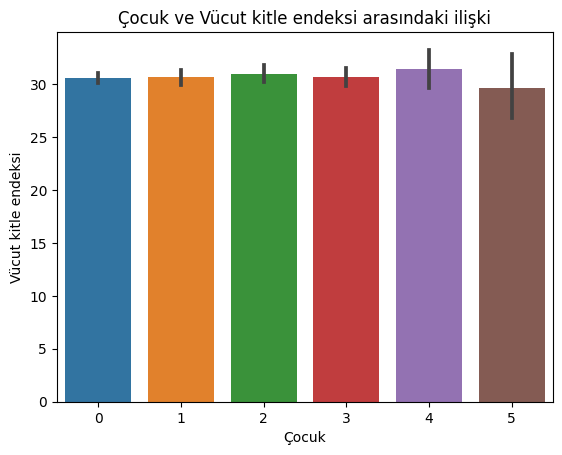

In [10]:
#Vücut kitle endeksi ile çocuk arasında bariz bir ilişki görünmüyor
sns.barplot(x="children", y="bmi", data=df)
plt.xlabel("Çocuk")
plt.ylabel("Vücut kitle endeksi")
plt.title("Çocuk ve Vücut kitle endeksi arasındaki ilişki")
plt.show()

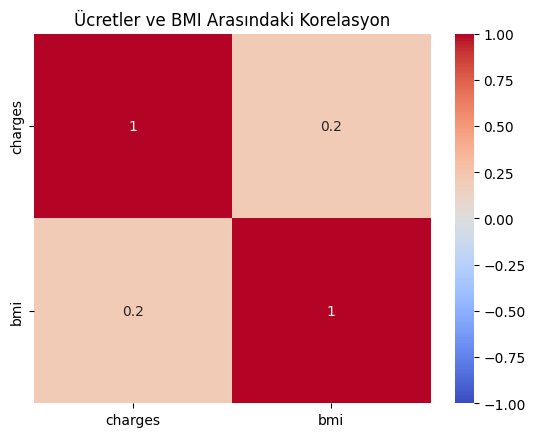

In [11]:
#Vücut kitle endeksi ile ücretler arasında bir ilişki görünmüyor
bmi = df["bmi"]
charges = df["charges"]
veri = pd.DataFrame({"charges":charges,"bmi":bmi})

korelasyon_matrisi = veri.corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Ücretler ve BMI Arasındaki Korelasyon")
plt.show()

<Figure size 1000x600 with 0 Axes>

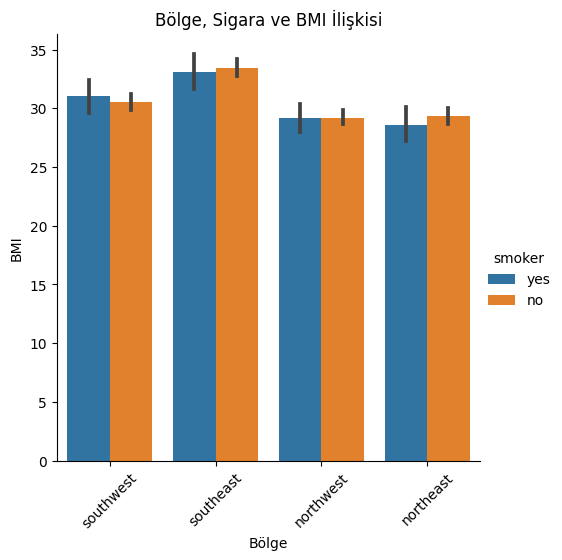

In [12]:
#Hiçbir şey anlayamadım veriler hatalı geldi
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="region", y="bmi", hue="smoker", kind="bar")
plt.xlabel("Bölge")
plt.ylabel("BMI")
plt.title("Bölge, Sigara ve BMI İlişkisi")
plt.xticks(rotation=45)
plt.show()

Veri ön işleme

In [14]:
insurance = df.drop_duplicates() # aynı verileri silmek için kullanılır

input_df = insurance.drop(columns="charges") #verileri ikiye ayırdık
target_df = insurance["charges"]


def bmi_estimator(column): # vücut kitle endeksini kategorik hale getirdik
    if column < 18.5:
        return 'underweight'
    elif (column >= 18.5) and (column<=24.9):
        return 'healthy weight'
    elif (column>=25) and (column<=29.9):
        return 'overweight'
    else:
        return 'obese'
input_df['bmi_class']=input_df.bmi.map(bmi_estimator)

sex_dict = {'male':0, 'female':1} # kategorik değerleri işlemek için sayısal verilere dönüştürüyoruz
smoker_dict = {'no':0, 'yes':1}

input_df['sex'] = input_df.sex.map(sex_dict)
input_df['smoker'] = input_df.smoker.map(smoker_dict)
columns_to_encode = ['region', 'bmi_class']

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(input_df[columns_to_encode])

encoded_cols = list(encoder.get_feature_names_out(columns_to_encode))

input_df[encoded_cols] = encoder.transform(input_df[columns_to_encode])

c:\Users\alcnyldz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
input_df = input_df.drop(columns='region')#bölge kısmını artık çıkarabiliriz
input_df

,age,sex,bmi,children,smoker,bmi_class,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,19,1,27.900,0,1,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18,0,33.770,1,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,28,0,33.000,3,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,0,22.705,0,0,healthy weight,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,0,28.880,0,0,overweight,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,obese,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,18,1,31.920,0,0,obese,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,18,1,36.850,0,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,21,1,25.800,0,0,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
columns_to_scale = ['age','bmi','children']
input_df[columns_to_scale].head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(input_df[columns_to_scale])

input_df[columns_to_scale] = scaler.transform(input_df[columns_to_scale])

In [18]:
input_df = input_df.drop(columns='bmi_class')
input_df.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,0.021739,1,0.321227,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0,0.479150,0.2,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0,0.458434,0.6,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0,0.181464,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0,0.347592,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
input_df.describe().loc[['min','max']]

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(input_df, target_df, test_size=0.2, random_state=42)

In [21]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
1114,0.108696,0,0.230024,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
968,0.065217,0,0.263250,0.4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
599,0.739130,1,0.580172,0.4,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
170,0.978261,0,0.686306,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
275,0.630435,1,0.286252,0.4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.717391,1,0.511165,0.4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1131,0.195652,0,0.805488,0.4,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1295,0.043478,0,0.162497,0.2,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
861,0.434783,1,0.323917,0.6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
X_val

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
900,0.673913,0,0.176352,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1064,0.239130,1,0.259349,0.8,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1256,0.717391,1,0.549502,0.6,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
298,0.282609,0,0.495830,0.6,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
237,0.282609,0,0.603444,0.4,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1.000000,0,0.659672,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
542,0.978261,1,0.547215,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
760,0.086957,1,0.500942,0.4,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1284,0.934783,0,0.547215,0.2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [23]:
y_train

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64

In [24]:
y_val

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64